# Introducción a TensorFlow

In [1]:
import tensorflow as tf

In [2]:
x1 = tf.constant([1,2,3,4,5])
x2 = tf.constant([6,7,8,9,10])

In [3]:
res = tf.multiply(x1,x2)
print(res)

Tensor("Mul:0", shape=(5,), dtype=int32)


In [4]:
# Iniciando una sesión en TensorFlow
sess = tf.Session()
print(sess.run(res))
sess.close()

[ 6 14 24 36 50]


In [5]:
# otra forma de iniciar una sesión en tf.

with tf.Session() as sess:
    output = sess.run(res)
    print(output)

[ 6 14 24 36 50]


In [6]:
# configuraciones para trabajar con imagenes
config = tf.ConfigProto(log_device_placement = True)
config = tf.ConfigProto(allow_soft_placement = True)

# Aprendizaje neuronal de las señales de tráfico

In [7]:
import os
import skimage.io as imd # esta es como el sckit learn de las imagenes, las imagenes son tan importantes dentro del mundo del

#bigdata que tienen librerias dedicada solo a ellas !

In [8]:
def load_ml_data(data_directory):
    dirs = [d for d in os.listdir(data_directory)
           if os.path.isdir(os.path.join(data_directory,d))]
    labels = []
    images = []
    for d in dirs:
        label_dir = os.path.join(data_directory,d)
        file_names = [os.path.join(label_dir,f)
                     for f in os.listdir(label_dir)
                     if f.endswith(".ppm")] # este condicional es debido a que en cada  carpeta hay un archivo csv.
       
        for f in file_names:
            images.append(imd.imread(f))
            labels.append(int(d))
    return images, labels

In [9]:
main_dir = "/home/israel/Documentos/Machine Learning/python-ml-course-master/datasets/belgian/"
train_data_dir = os.path.join(main_dir, "Training")
test_data_dir = os.path.join(main_dir, "Testing")

In [10]:
images, labels = load_ml_data(train_data_dir)

In [11]:
import numpy as np

In [12]:
images = np.array(images)
labels = np.array(labels)

In [13]:
images[0] #[x,y,z] es un pixel (rojo,verde,azul)

array([[[112,  96,  67],
        [107,  92,  64],
        [112,  95,  69],
        ...,
        [107, 100,  63],
        [109, 101,  65],
        [110, 102,  66]],

       [[112,  95,  68],
        [110,  94,  66],
        [113,  96,  69],
        ...,
        [109, 102,  65],
        [110, 103,  66],
        [111, 104,  67]],

       [[113,  96,  69],
        [114,  97,  70],
        [115,  99,  71],
        ...,
        [110, 104,  66],
        [110, 104,  66],
        [110, 104,  67]],

       ...,

       [[111,  86,  62],
        [102,  83,  60],
        [ 98,  81,  59],
        ...,
        [ 54,  38,  31],
        [ 53,  41,  33],
        [ 54,  45,  36]],

       [[109,  84,  62],
        [106,  85,  63],
        [100,  82,  61],
        ...,
        [ 56,  38,  30],
        [ 52,  40,  31],
        [ 51,  44,  34]],

       [[108,  85,  62],
        [110,  88,  67],
        [105,  85,  65],
        ...,
        [ 57,  39,  30],
        [ 51,  40,  30],
        [ 48,  43,  32]]

In [14]:
len(set(labels)) # tipos de etiquetas

62

In [15]:
images.flags   # Parametros de como ah ido la carga del array

  C_CONTIGUOUS : True
  F_CONTIGUOUS : True
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

In [16]:
images.itemsize # 8bits

8

In [17]:
images.nbytes #bytes

36600

In [18]:
images.nbytes/images.itemsize # bits de información

4575.0

In [19]:
import matplotlib.pyplot as plt

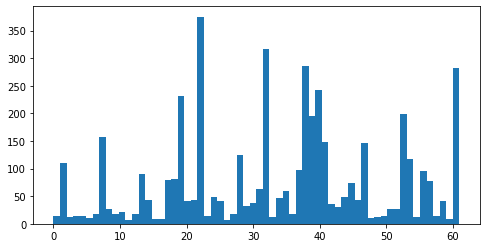

In [20]:
fig = plt.figure(figsize = (8,4))
plt.hist(labels, len(set(labels)))
plt.show() # ojo con las etiquetas que estan muy presentes

In [21]:
# vamos a generar una lista de numeros aleatorios para extraer imagenes del array

In [22]:
import random

In [23]:
rand_signs = random.sample(range(0,len(labels)),6)
rand_signs

[4540, 2057, 4452, 1660, 1866, 3471]

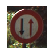

Forma:(116, 110, 3), min:6, max:255


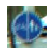

Forma:(39, 37, 3), min:0, max:255


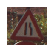

Forma:(91, 94, 3), min:24, max:230


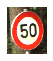

Forma:(175, 147, 3), min:6, max:255


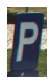

Forma:(122, 69, 3), min:18, max:255


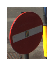

Forma:(286, 217, 3), min:0, max:255


In [24]:
for i in range(len(rand_signs)):
    temp_im = images[rand_signs[i]] # imagen temporal
    plt.subplot(1,6,i+1)
    plt.axis("off")
    plt.imshow(images[rand_signs[i]])
    plt.subplots_adjust(wspace=0.5)
    plt.show()
    print("Forma:{0}, min:{1}, max:{2}".format(temp_im.shape,
                                                    temp_im.min(),
                                                    temp_im.max()))

In [25]:
# la diferencia de tamaño sera una caracteristica importante a considerar

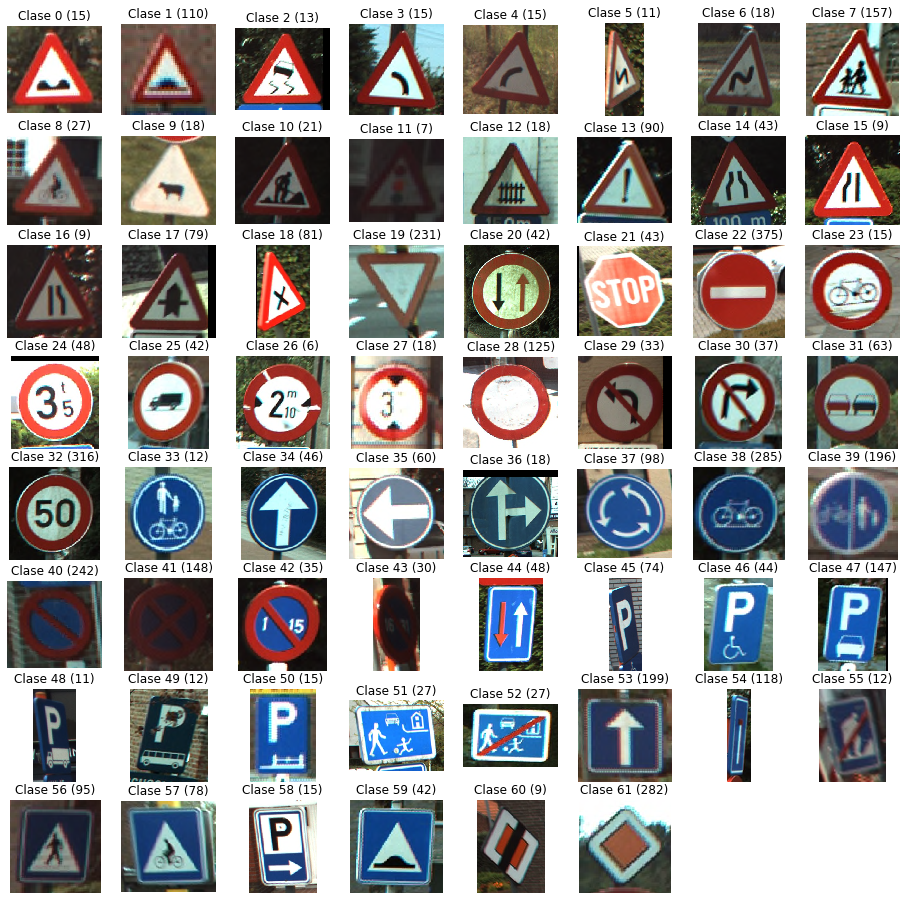

In [26]:
unique_labels = set(labels)
plt.figure(figsize = (16,16))
i = 1
for label in unique_labels:
    
    temp_im = images[list(labels).index(label)] # imagen temporal
    plt.subplot(8,8,i)
    plt.axis("off")
    plt.title("Clase {0} ({1})".format(label, list(labels).count(label)))
    i += 1
    plt.imshow(temp_im)

el hecho de que haya mas fotos de un tipo de imagen, me inplica que todas son de la misma categoria? guardan relación ? hay algun patron ?, es decir, si nose donde clasificar alguna imagen, entonces sera mas proxima a otra imagen. \\  \\

mi resp: Al fotografo le dio por tomar mas fotos de unas imagens que de otras

# Modelo de la red Neuronal con Tensor Flow
* Las imagenes no todas son del mismo tamaño
* Hay 62 clases de imagenes ( desde 0 hasta 61)
* La distribución de señales de tráfico no es uniforme (algunas salen mas veces que otras)

In [27]:
# utilizar el color como una regla de desicion es poco util, ya que la ilumniación en las fotos es diferente y
#otras parece que las tomo un borracho, por lo que pasaremos a escala de grises.


In [28]:
from skimage import transform

In [29]:
# Cual deberia ser el tamaño de las imagenes?

w = 9999
h = 9999

for image in images:
    if image.shape[0]<h:
        h = image.shape[0]
    if image.shape[1]<w:
        w = image.shape[1]
print("Tamaño minimo: {0}x{1}".format(h,w))

Tamaño minimo: 22x20


In [30]:
# con imagenes tan pequeñas se perderia mucha información
# por lo que me la jugare con el tamaño

In [31]:
images30 = [transform.resize(image,(30,30)) for image in images]

In [32]:
images30

[array([[[0.46222222, 0.39611111, 0.28630719],
         [0.49735294, 0.43137255, 0.30705882],
         [0.51552288, 0.44852941, 0.31470588],
         ...,
         [0.43921569, 0.41094771, 0.25490196],
         [0.40509804, 0.38058824, 0.23852941],
         [0.42575163, 0.40222222, 0.25490196]],
 
        [[0.45996732, 0.40954248, 0.29019608],
         [0.48862745, 0.43735294, 0.30313725],
         [0.54084967, 0.47107843, 0.32156863],
         ...,
         [0.46764706, 0.42222222, 0.26617647],
         [0.42960784, 0.38745098, 0.24901961],
         [0.43431373, 0.41859477, 0.25614379]],
 
        [[0.46218954, 0.40898693, 0.28401961],
         [0.48441176, 0.43245098, 0.29039216],
         [0.51960784, 0.46388889, 0.30473856],
         ...,
         [0.48267974, 0.4379085 , 0.28578431],
         [0.47960784, 0.43411765, 0.28029412],
         [0.4754902 , 0.45712418, 0.27323529]],
 
        ...,
 
        [[0.51019608, 0.42366013, 0.30320261],
         [0.47705882, 0.38205882, 0.27705

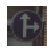

Forma:(30, 30, 3), min:0.1216601307189543, max:0.5212156862745125


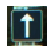

Forma:(30, 30, 3), min:0.01261437908496725, max:0.99359477124183


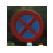

Forma:(30, 30, 3), min:0.04764705882352946, max:0.9453464052287551


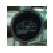

Forma:(30, 30, 3), min:0.030065359477124007, max:0.9744553376906322


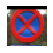

Forma:(30, 30, 3), min:0.0, max:0.9921568627450981


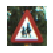

Forma:(30, 30, 3), min:0.08669281045751666, max:0.9921568627450981


In [33]:
# Veamos como quedan

rand_signs = random.sample(range(0,len(labels)),6)
for i in range(len(rand_signs)):
    temp_im = images30[rand_signs[i]] # imagen temporal
    plt.subplot(1,6,i+1)
    plt.axis("off")
    plt.imshow(temp_im)
    plt.subplots_adjust(wspace=0.5)
    plt.show()
    print("Forma:{0}, min:{1}, max:{2}".format(temp_im.shape,
                                                    temp_im.min(),
                                                    temp_im.max()))



In [35]:
from skimage.color import rgb2gray

In [36]:
images30 = np.array(images30)
images30 = rgb2gray(images30)

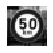

Forma:(30, 30), min:0.11906901960784308, max:0.9518781960784315


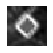

Forma:(30, 30), min:0.0969325254901961, max:0.8285082833333334


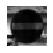

Forma:(30, 30), min:0.10897901525054457, max:0.959616331154684


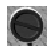

Forma:(30, 30), min:0.1217916339869281, max:0.9611315294117647


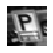

Forma:(30, 30), min:0.052199058823529446, max:0.9767200784313725


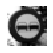

Forma:(30, 30), min:0.116753523529412, max:0.9957956862745099


In [37]:

rand_signs = random.sample(range(0,len(labels)),6)
for i in range(len(rand_signs)):
    temp_im = images30[rand_signs[i]] # imagen temporal
    plt.subplot(1,6,i+1)
    plt.axis("off")
    plt.imshow(temp_im, cmap = "gray") # imshow utilizara el mapa de calor por defecto, es por esto explicitamos en cmap ="gray" 
    plt.subplots_adjust(wspace=0.5)
    plt.show()
    print("Forma:{0}, min:{1}, max:{2}".format(temp_im.shape,
                                                    temp_im.min(),
                                                    temp_im.max()))


In [40]:
# Construcción del modelo

x = tf.placeholder(dtype = tf.float32, shape = [None, 30,30])
y = tf.placeholder(dtype = tf.int32, shape = [None])

images_flat = tf.contrib.layers.flatten(x) 
#capa de conección par la clasificación
logits = tf.contrib.layers.fully_connected(images_flat,62,tf.nn.relu)

#Función de perdida

loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels = y, logits = logits))

train_opt = tf.train.AdamOptimizer(learning_rate = 0.001).minimize(loss)

final_pred = tf.argmax(logits,1)

accuracy = tf.reduce_mean(tf.cast(final_pred, tf.float32))

In [41]:
images_flat

<tf.Tensor 'Flatten_2/flatten/Reshape:0' shape=(?, 900) dtype=float32>

In [42]:
logits

<tf.Tensor 'fully_connected_2/Relu:0' shape=(?, 62) dtype=float32>

In [43]:
loss

<tf.Tensor 'Mean:0' shape=() dtype=float32>

In [44]:
final_pred

<tf.Tensor 'ArgMax:0' shape=(?,) dtype=int64>

In [48]:
tf.set_random_seed(1234)

sess = tf.Session()

sess.run(tf.global_variables_initializer())

for i in range(601):
    
    _, accuracy_val = sess.run([train_opt, accuracy],
                              feed_dict= {
                                  x: images30,
                                  y: list(labels)
                              })
    #_, loss_val = sess.run([train_opt, loss],
    #                          feed_dict= {
    #                              x: images30,
    #                              y: list(labels)
    #                          })
    if i%50 == 0:
        print("EPOCH", i)
        print("Eficacia: ", accuracy_val)
        #print("Pérdidas:", loss_val)
    #print("Fin del Ecpoh ", i)

EPOCH 0
Eficacia:  38.77661
EPOCH 50
Eficacia:  34.780766
EPOCH 100
Eficacia:  34.89202
EPOCH 150
Eficacia:  34.8894
EPOCH 200
Eficacia:  34.868416
EPOCH 250
Eficacia:  34.794098
EPOCH 300
Eficacia:  34.70339
EPOCH 350
Eficacia:  34.798252
EPOCH 400
Eficacia:  34.88022
EPOCH 450
Eficacia:  34.84634
EPOCH 500
Eficacia:  34.82317
EPOCH 550
Eficacia:  34.83519
EPOCH 600
Eficacia:  34.835846


## Evaluación de la red neuronal

In [73]:
sample_idx = random.sample(range(len(images30)),40)
sample_images = [images30[i] for i in sample_idx]
sample_labels = [labels[i] for i in sample_idx]

In [74]:
prediction  = sess.run([final_pred], feed_dict = {x:sample_images})[0]

In [75]:
prediction

array([56, 61, 40, 40, 32, 53, 32, 22, 53, 22, 40, 40, 32, 38, 61, 32, 56,
       56, 32, 51, 40, 54, 32,  7, 38, 45,  7, 56, 61, 22,  7, 18, 39,  7,
       38, 38, 38, 28, 37,  7])

In [76]:
sample_labels

[2,
 61,
 43,
 42,
 32,
 53,
 32,
 22,
 53,
 22,
 40,
 40,
 32,
 59,
 44,
 32,
 57,
 56,
 32,
 51,
 40,
 54,
 32,
 7,
 38,
 45,
 13,
 56,
 61,
 22,
 7,
 18,
 39,
 7,
 38,
 38,
 44,
 22,
 37,
 7]

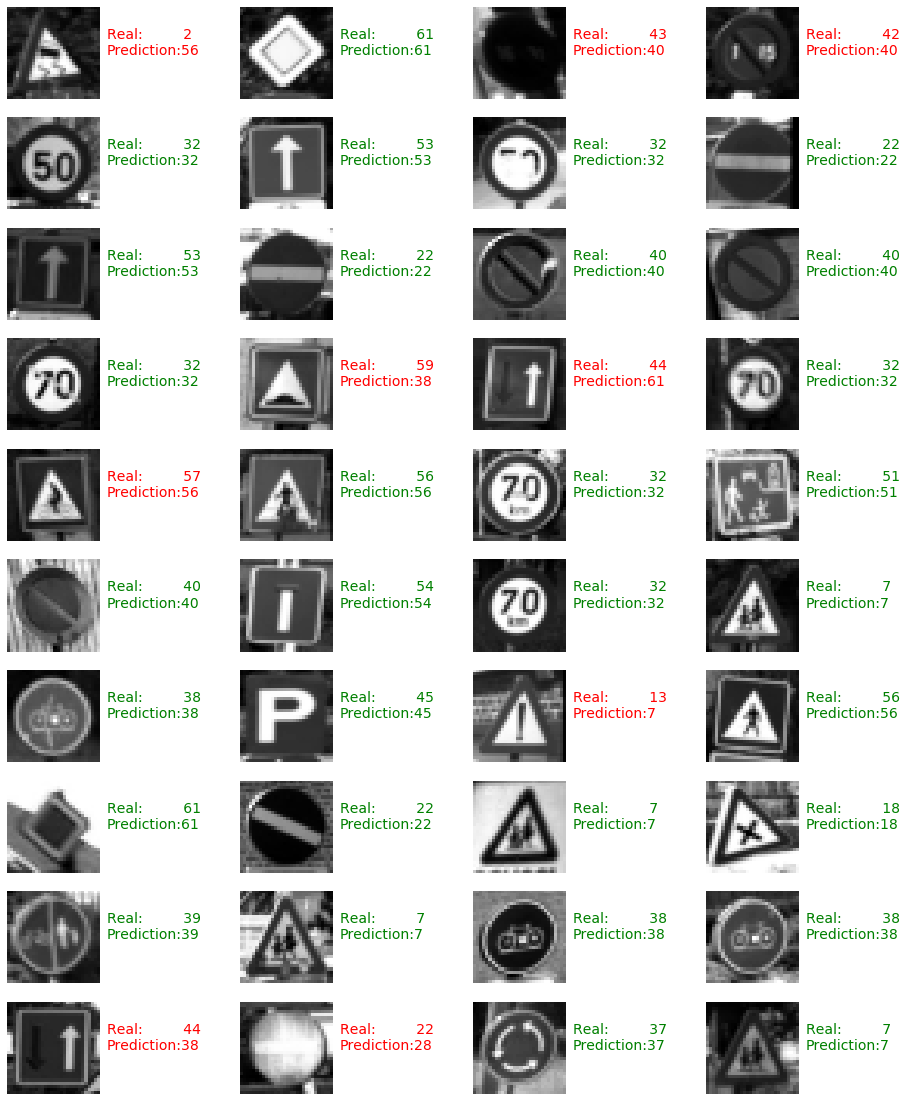

In [78]:
plt.figure(figsize = (16,20))
for i in range(len(sample_images)):
    truth = sample_labels[i]
    predi = prediction[i]
    plt.subplot(10,4,i+1)
    plt.axis("off")
    color = "green" if truth == predi else "red"
    plt.text(32,15,"Real:         {0}\nPrediction:{1}".format(truth,predi),
            fontsize = 14, color=color)
    plt.imshow(sample_images[i], cmap = "gray")
plt.show()

In [79]:
test_images, test_labels = load_ml_data(test_data_dir)

In [80]:
test_images30 = [transform.resize(im,(30,30)) for im in test_images]

In [81]:
test_images30 = rgb2gray(np.array(test_images30))

In [82]:
prediction = sess.run([final_pred], feed_dict={x:test_images30})[0]

In [83]:
match_count = sum([int(l0 == lp) for l0, lp in zip(test_labels, prediction)])
match_count

1799

In [84]:
acc = match_count/len(test_labels)*100
print("Eficacia de la red neuronal: {:.2f}".format(acc))

Eficacia de la red neuronal: 71.39
